In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
data=pd.read_csv('C:\\Users\LENOVO\Desktop\playstore app review\Play Store Data.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data Description


App: Contains the name of the app with a short description (optional).

Category : It gives the category to the app.

Rating: It contains the average rating the respective app received from its users.

Reviews: It contains the number of users that have dropped a review for the respective app.

Size: It contains the the disk space required to install the respective app.

Installs: It gives the rounded figure of number of times the respective app was downloaded.

Type: It states whether an app is free to use or paid.

Price: It gives the price payable to install the app. For free type apps, the price is zero.

Content rating: It states whether or not an app is suitable for all age groups or not.

Genres: It gives the genre(s) to which the respective app belongs.

Last updated: It gives the day in which the latest update was released.

Current Ver: It gives the current version of the respective app.

Android Ver: It gives the android version of the respective app.

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [272]:
data.shape

(10841, 13)

In [273]:
#finding the duplicate values
dup=data.duplicated().value_counts()
dup

False    10358
True       483
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\2303881988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dup,palette=['yellow','red'])


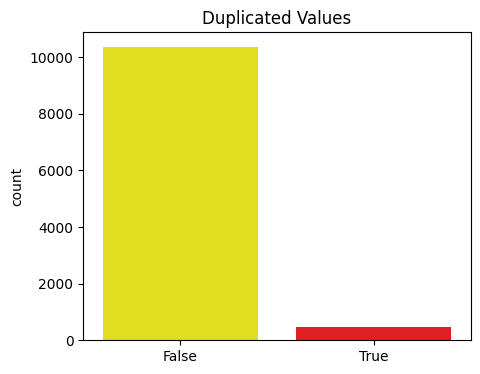

In [274]:
plt.figure(figsize=(5,4))
sns.barplot(data=dup,palette=['yellow','red'])
plt.title('Duplicated Values')
plt.show()

In [275]:
#droping the duplicates
data.drop_duplicates(inplace=True)

In [276]:
data.shape

(10358, 13)

In [277]:
#finding the null values
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [278]:
print(data.apply(lambda col : col.unique()))

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object


HANDLING THE MISSING VALUES IN THE DATASET

In [279]:
data['Type'].value_counts()

Type
Free    9591
Paid     765
0          1
Name: count, dtype: int64

In [280]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [281]:
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [282]:
data['Type'].fillna('Free',inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\4144533805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna('Free',inplace=True)


In [283]:
#HANDLING THE MISSING THE VALUE SIN THE RATING COLUMN

data['Rating'].isnull().sum()

1465

In [284]:
mean_rating=data['Rating'].mean()
median_rating=data['Rating'].median()
round(mean_rating,1),round(median_rating,1)

(4.2, 4.3)

Text(0.5, 0, 'Rating')

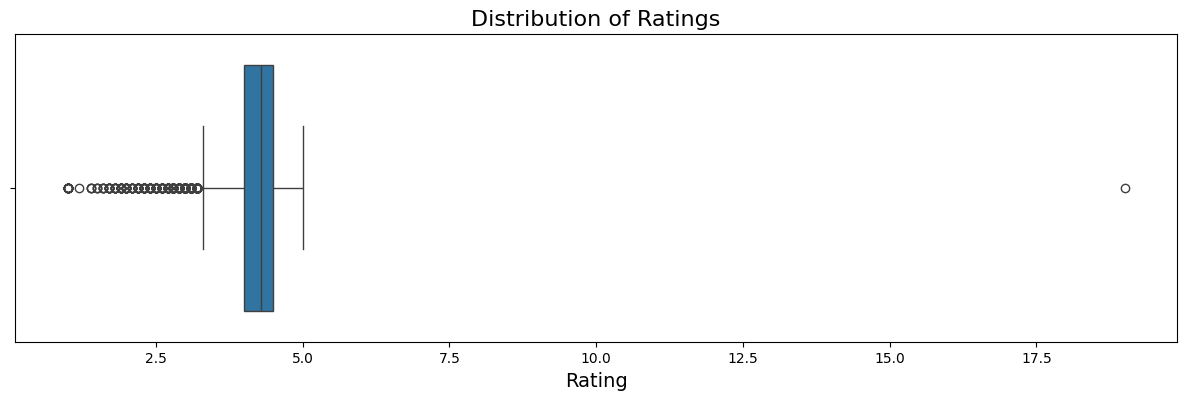

In [285]:
# Create the figure with specified size
plt.figure(figsize=(15, 4))

# Create the box plot
ax = sns.boxplot(x=data['Rating'])

# Add a title and labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)

In [286]:
#from the bocplot we can see there are outliers in the data, mean is affected with outliers.
# So here we will impute the null values with median

data['Rating']=data['Rating'].fillna(data['Rating'].median())

In [287]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [288]:
#listing all the bottom values
sorted(data['Rating'])[-5:]

[5.0, 5.0, 5.0, 5.0, 19.0]

In [289]:
data[data['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [290]:
#Since the rating cannot be 19 and also category cannot be 1.9
#The entire row is misplaced because of one value of category column is missing so its better to drop the entire row.

In [291]:
data.drop(data[data['Rating']==19].index,inplace=True)

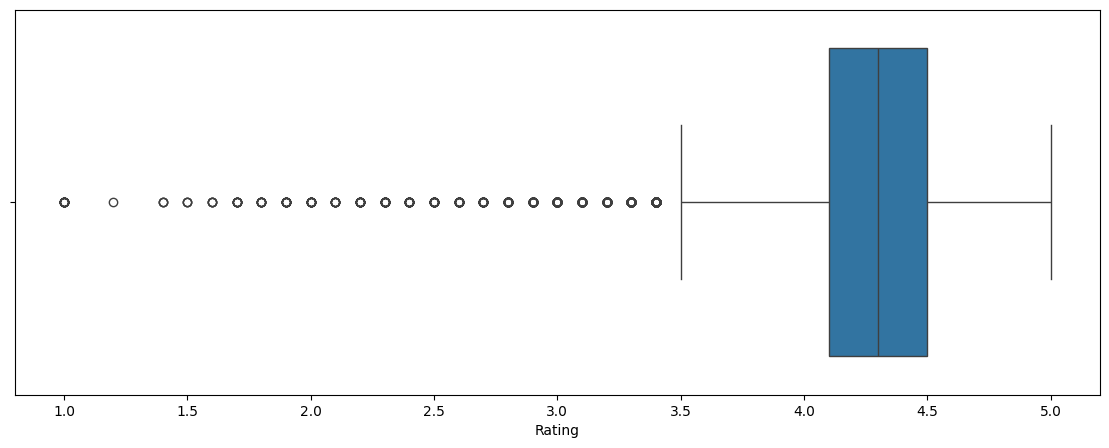

In [292]:
#boxplot to detect the outliers
plt.figure(figsize=(14,5))
ax=sns.boxplot(x=data['Rating'])
plt.show()

from the graph we can see the outliers but there is no need of removing it, 
because the rating is between 1-5 and it has been captured properly

In [293]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Checking for null values in the current and android version

In [294]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [295]:
data.dropna(inplace=True)

In [296]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [297]:
data.shape

(10347, 13)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10347 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10347 non-null  object 
 1   Category        10347 non-null  object 
 2   Rating          10347 non-null  float64
 3   Reviews         10347 non-null  object 
 4   Size            10347 non-null  object 
 5   Installs        10347 non-null  object 
 6   Type            10347 non-null  object 
 7   Price           10347 non-null  object 
 8   Content Rating  10347 non-null  object 
 9   Genres          10347 non-null  object 
 10  Last Updated    10347 non-null  object 
 11  Current Ver     10347 non-null  object 
 12  Android Ver     10347 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [299]:
#changing the time format
from datetime import datetime
data['Last Updated']=pd.to_datetime(data['Last Updated'],format='%B %d, %Y')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


The columns installs has special characters (,),(+)

In [300]:
data['Installs'].value_counts()

Installs
1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [301]:
data['Installs']=data['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [302]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10347, dtype: int32

Defining a function to convert all the entries in KB to MB and then converting them to float datatype.
We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB.
To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.
We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [303]:
def kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 2)
    else:
      return val
  except:
    return val   

In [304]:
# The kb_to_mb funtion applied to the size column

data['Size'] = data['Size'].apply(lambda x: kb_to_mb(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


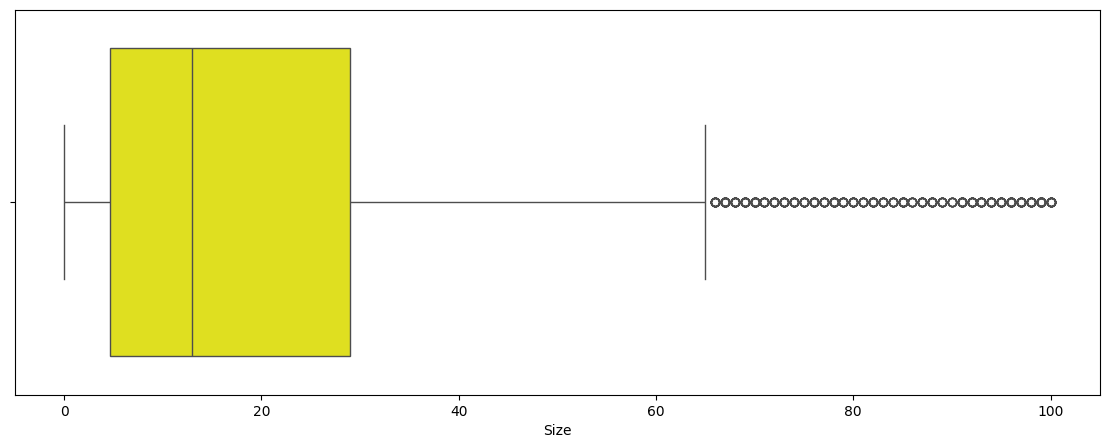

In [305]:
new_size=data[data['Size'] !='Varies with device']['Size']
plt.figure(figsize=(14,5))
sns.boxplot(x=new_size,color='Yellow')
plt.show()

In [306]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [307]:
data['Price']=data['Price'].str.replace('$','').astype(float)

In [308]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [309]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Rating,10347.0,4.203779,1.0,4.1,4.3,4.5,5.0,0.485707
Installs,10347.0,14171289.979414,0.0,1000.0,100000.0,1000000.0,1000000000.0,80277140.870323
Price,10347.0,1.031461,0.0,0.0,0.0,0.0,400.0,16.286468
Last Updated,10347,2017-11-14 15:23:07.184691200,2010-05-21 00:00:00,2017-09-04 12:00:00,2018-05-20 00:00:00,2018-07-19 00:00:00,2018-08-08 00:00:00,NaN


Correlation

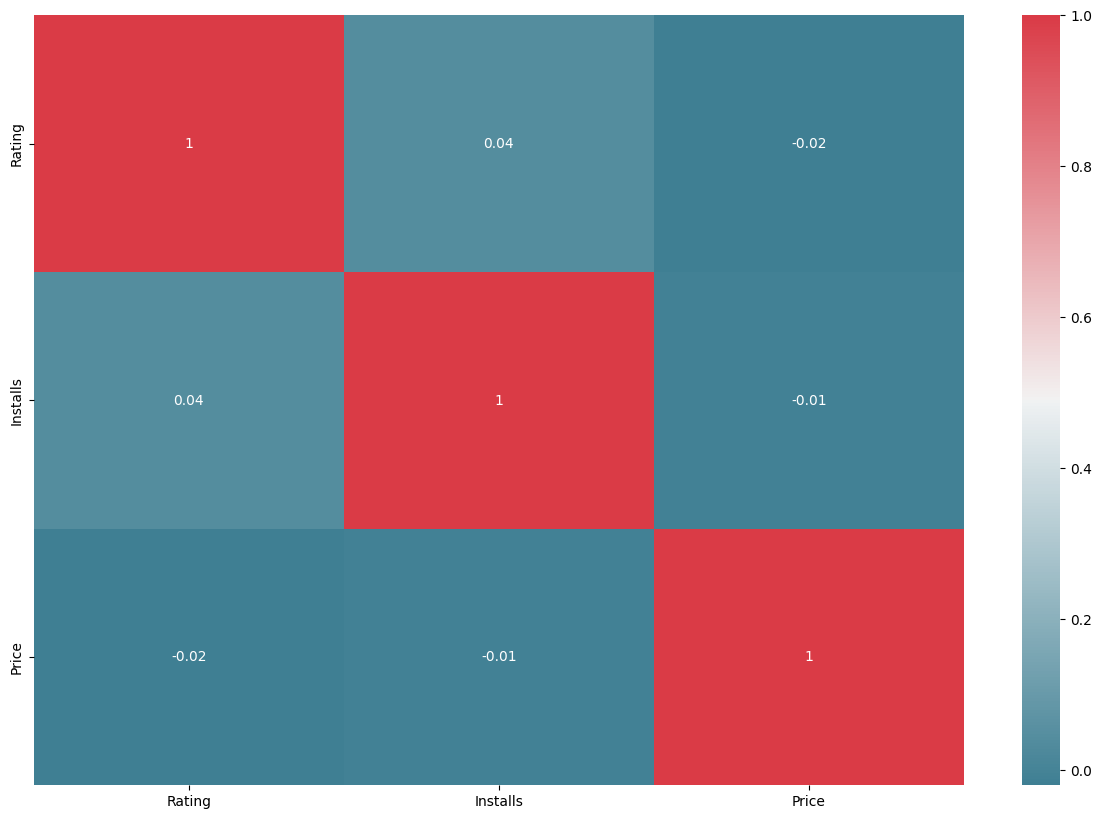

In [310]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set the figure size
plt.figure(figsize=(15,10))

# Create a diverging palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap
sns.heatmap(np.round(correlation_matrix, 2), annot=True, cmap=cmap)

# Display the plot
plt.show()

EXPLORATORY DATA ANALYSIS

Univeriate Analysis

1.Which Category is most preffered by people?

In [311]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [312]:
data['Category'].value_counts()

Category
FAMILY                 1940
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

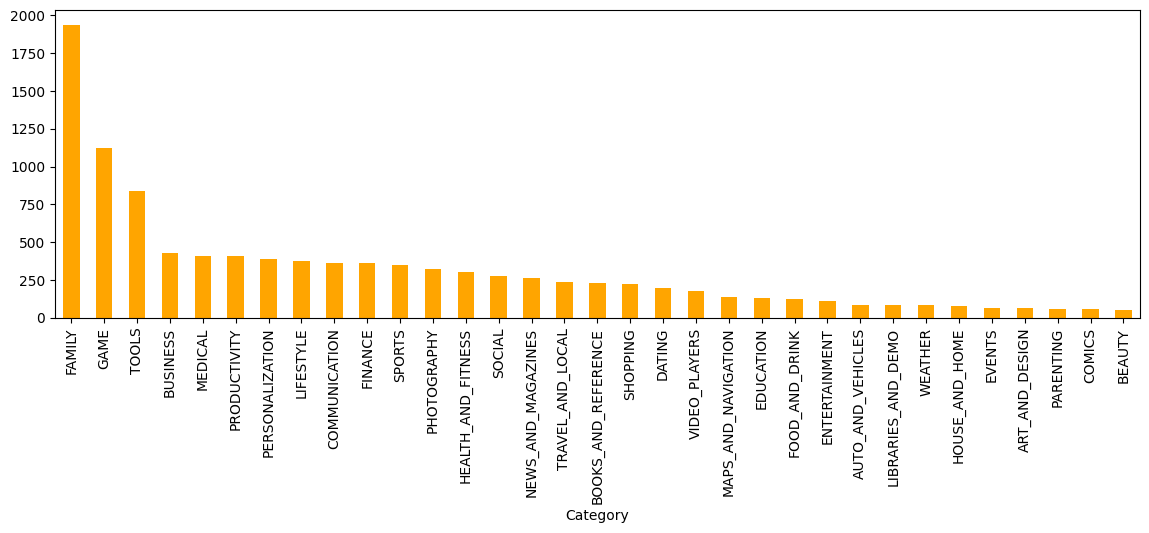

In [313]:
plt.figure(figsize=(14,4))
data['Category'].value_counts().plot(kind='bar',color='orange').invert_yaxis
plt.show()

Observation

Family people are most preferred.

2. What is the overall ratings for an app?

In [314]:
data['Rating'].value_counts()

Rating
4.3    2477
4.4    1031
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Rating ')

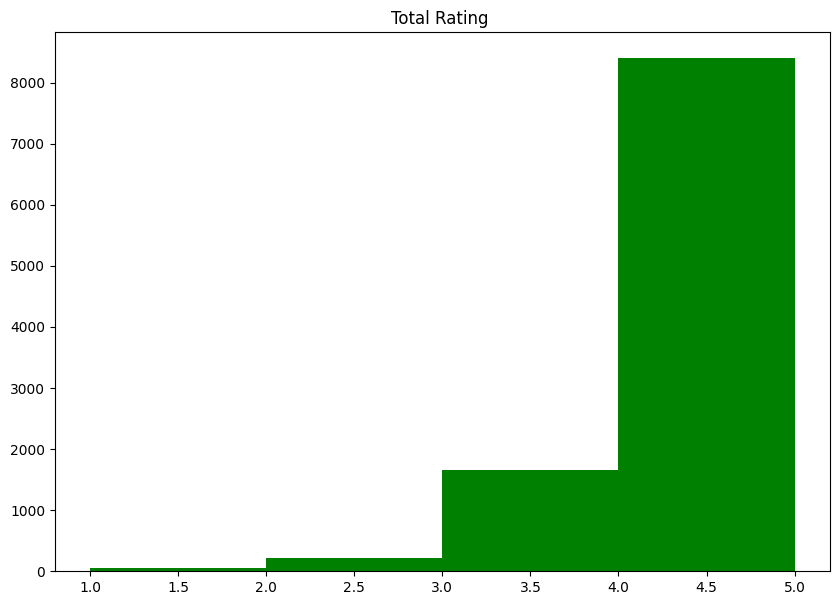

In [315]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['Rating'], bins = [1, 2, 3, 4, 5], color = 'g')
plt.title("Total Rating ")

Observation

Almost more than 80% of the app in playstore lies between the range of 4 - 5

3.How many Installation happened?

In [316]:
dt=data['Installs'].value_counts().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\3821729951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dt, x = data['Installs'].value_counts().keys(), y = data['Installs'].value_counts(),palette='coolwarm')


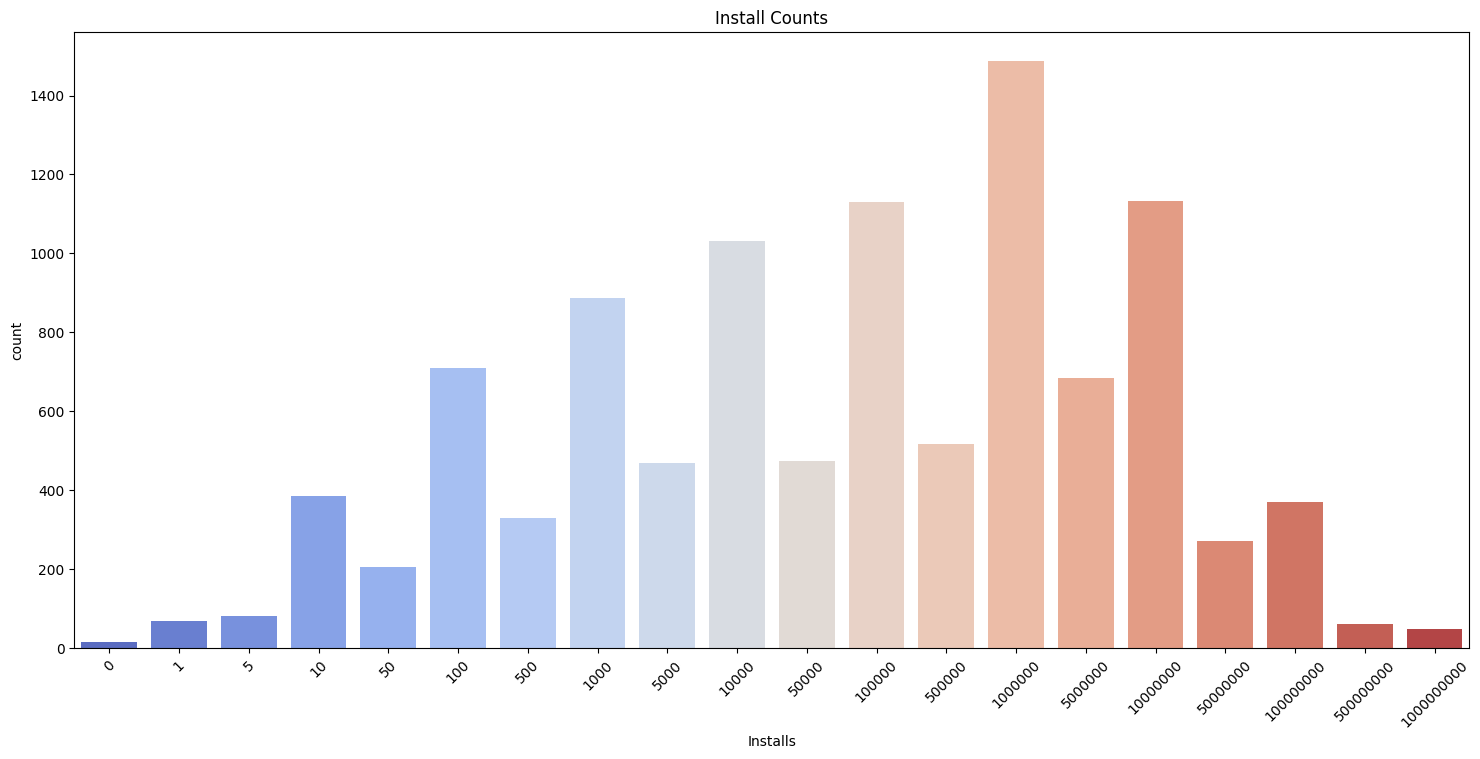

In [317]:
plt.figure(figsize = (18,8))
sns.barplot(data = dt, x = data['Installs'].value_counts().keys(), y = data['Installs'].value_counts(),palette='coolwarm')
plt.xticks(rotation = 45)
plt.title("Install Counts")
plt.xlabel("Installs");

Observations

There are 1488 apps with more than 10,00,000 downloads/ Installs.

almost same amount of apps have 1,00,00 and 100,00,000 downloads/ Installs.

5. Find the top Paid apps

In [318]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [319]:
paid_app=data[data['Type']=='Paid']
paid_app['Type'].value_counts()

Type
Paid    762
Name: count, dtype: int64

In [320]:
paid_app.sort_values(["Price"],
               axis = 0, ascending = False,
               inplace = True,
               na_position = "first")
paid_app

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\434717381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_app.sort_values(["Price"],


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
5359,I am rich(premium),FINANCE,3.5,472,0.94,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,Watch Face BW Inter,PERSONALIZATION,3.1,112,8.8,1000,Paid,0.99,Everyone,Personalization,2017-04-26,2.1.7,4.3 and up
6766,Little Magnet BT Pro,TOOLS,4.6,251,3.8,1000,Paid,0.99,Everyone,Tools,2018-08-05,4.1.4,4.2 and up
6732,BS Match Maker Premium,TOOLS,4.3,3,0.31,10,Paid,0.99,Everyone,Tools,2018-07-10,1.11.2,5.0 and up
6675,Infinity Dungeon VIP,FAMILY,4.3,21804,44.0,1000000,Paid,0.99,Everyone 10+,Role Playing,2018-07-03,2.6.6,2.3 and up


In [329]:
df=paid_app['Price'].value_counts().reset_index()
df

,Price,count
0,0.99,144
1,2.99,125
2,1.99,73
3,4.99,70
4,3.99,60
...,...,...
86,109.99,1
87,154.99,1
88,3.90,1
89,3.88,1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\4094653533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = df['count'],


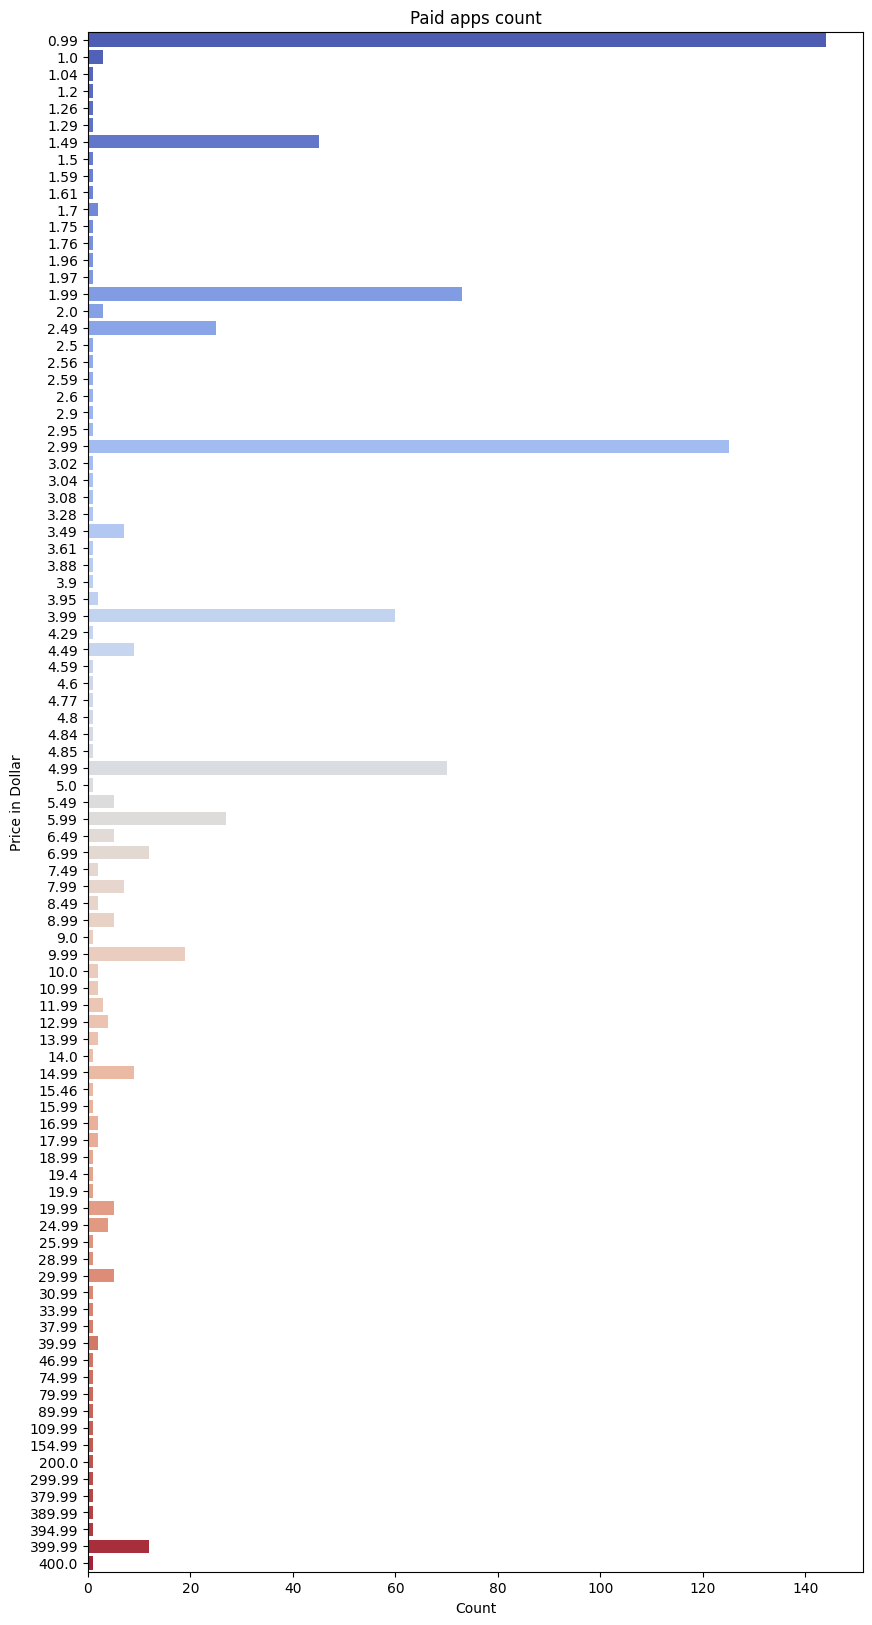

In [333]:
plt.figure(figsize = (10,20))
sns.barplot(data = df, x = df['count'],
                              y = df['Price'],orient='h',palette='coolwarm')
plt.title("Paid apps count")
plt.xlabel("Count")
plt.ylabel("Price in Dollar")
plt.show()

Observation

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

6. Content Rating

In [336]:
ps=data['Content Rating'].value_counts().reset_index()
ps

,Content Rating,count
0,Everyone,8372
1,Teen,1146
2,Mature 17+,447
3,Everyone 10+,377
4,Adults only 18+,3
5,Unrated,2


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\1171637592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ps, x = ps['Content Rating'], y = ps['count'],palette='coolwarm')


Text(0, 0.5, 'Count')

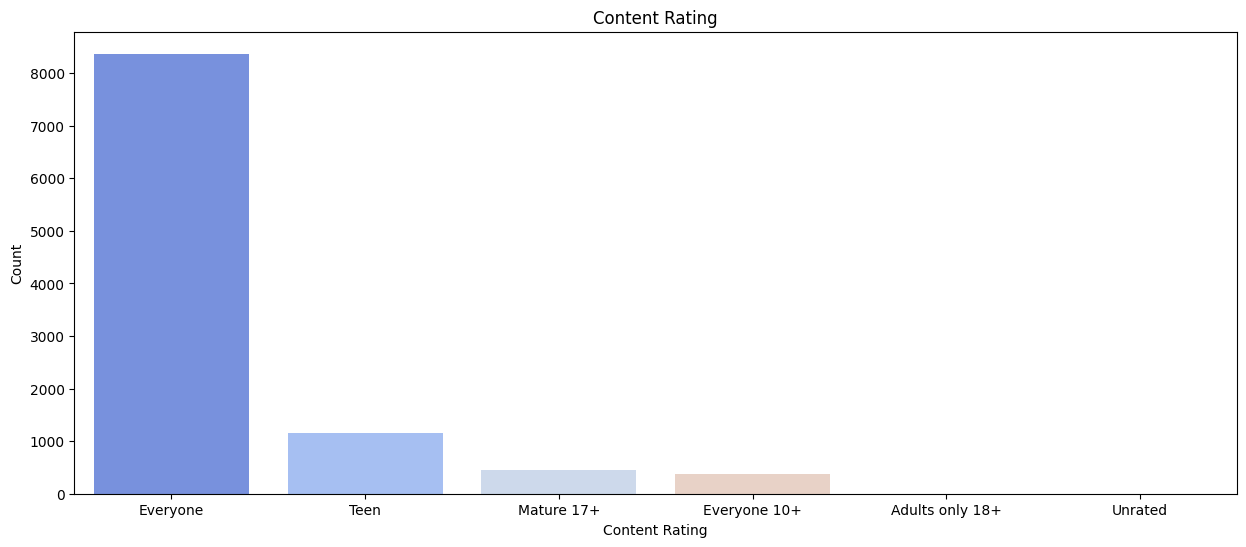

In [338]:
# Visualzing with the graph
plt.figure(figsize = (15,6))
sns.barplot(data = ps, x = ps['Content Rating'], y = ps['count'],palette='coolwarm')
plt.title("Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")

Observation

It looks like most of the apps are made for everyone and the real source of income for them is Ads.

7. Genres

In [344]:
df=data['Genres'].value_counts().iloc[:15]
df

Genres
Tools               840
Entertainment       587
Education           526
Business            427
Medical             408
Productivity        407
Personalization     386
Lifestyle           372
Communication       366
Sports              364
Finance             360
Action              356
Photography         322
Health & Fitness    306
Social              280
Name: count, dtype: int64

Text(0.5, 1.0, 'Genres')

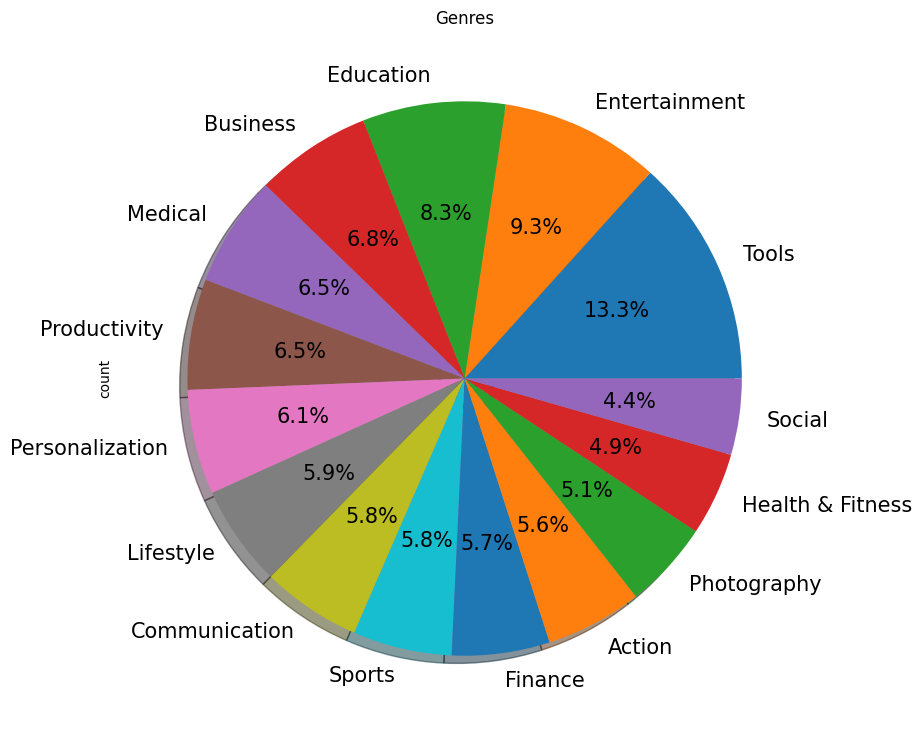

In [345]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
df.plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("Genres")

Observation

Looks like the most liked Genre is Tools but other than that every other app has equal weightage of likings

Bivariate Analysis

1. Find the top profitable app in terms of revenue

In [346]:
# Creating a column called revenue
paid_app['Revenue'] = paid_app['Price'] * paid_app['Installs']
paid_app.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\2364454976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_app['Revenue'] = paid_app['Price'] * paid_app['Installs']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4000000.0
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,39999.0
5359,I am rich(premium),FINANCE,3.5,472,0.94,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,1999950.0
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,1999950.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,39999000.0


In [347]:
# Sorting the Revenie column in decending order
top_paid_apps = paid_app.sort_values(["Revenue"],
               axis = 0, ascending = False)
top_paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,9900000.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\2050752556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_paid_apps, y =top_paid_apps['App'].iloc[:20],  x = top_paid_apps['Revenue'].iloc[:20],palette='coolwarm')
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


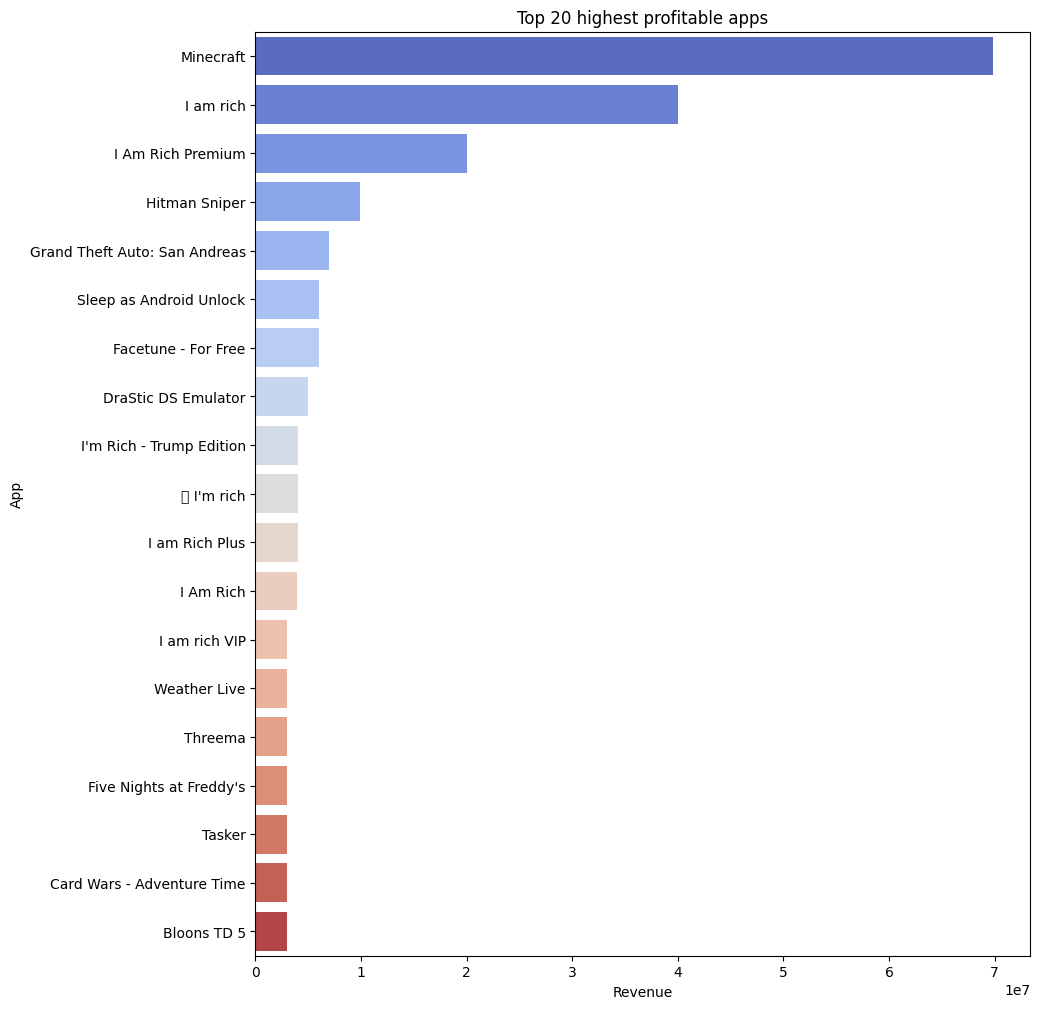

In [349]:
plt.figure(figsize = (10,12))
sns.barplot(data = top_paid_apps, y =top_paid_apps['App'].iloc[:20],  x = top_paid_apps['Revenue'].iloc[:20],palette='coolwarm')
plt.title("Top 20 highest profitable apps")
plt.show()

Observation

Minecraft is the most profitable paid application

2. What are the categories in which the top paid apps belong to?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8008\4289550137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = paid_app, x = paid_app["Category"],


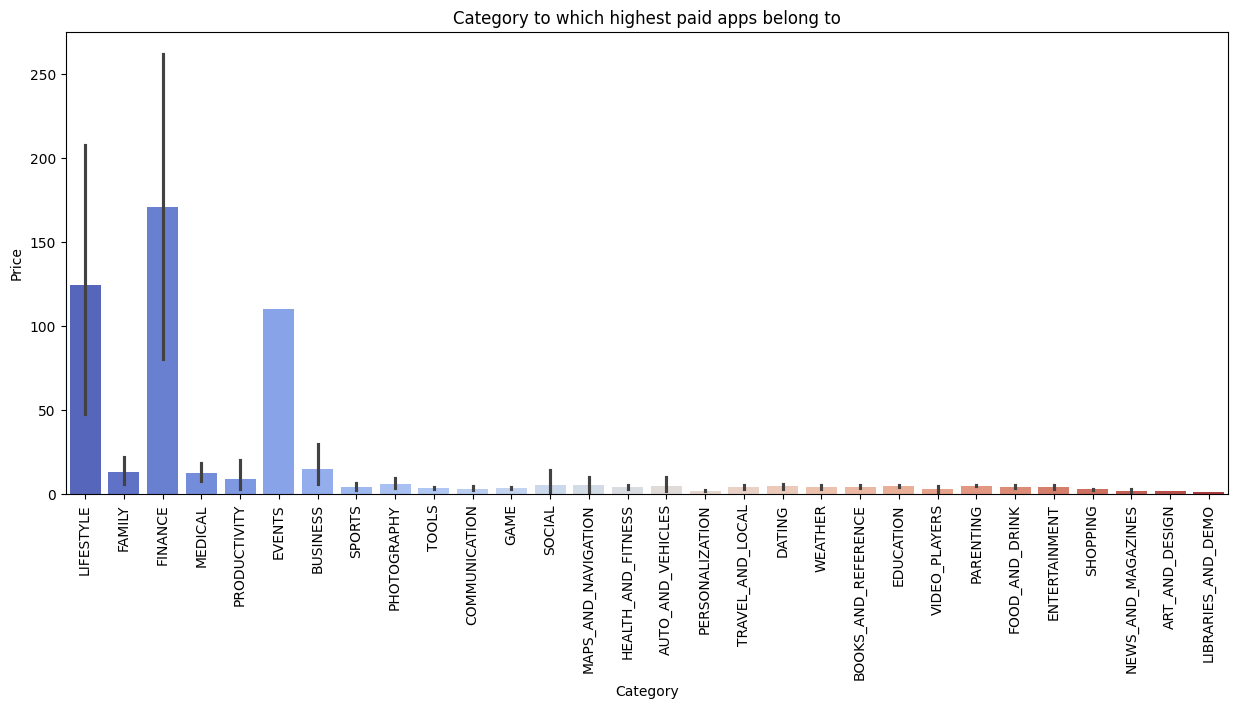

In [352]:
plt.figure(figsize = (15,6))
sns.barplot(data = paid_app, x = paid_app["Category"],
           y = paid_app['Price'],palette='coolwarm')
plt.xticks(rotation = 90)
plt.title("Category to which highest paid apps belong to")
plt.show()

Observation

The highest revenue generating category is Finance